<a href="https://colab.research.google.com/github/dhyannn/Speech-processing-and-recognition/blob/main/SPR_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install librosa scipy matplotlib numpy


In [2]:
import numpy as np
import librosa
import scipy.signal
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:
# 1. Load the speech signal
file_path = '/content/61-70968-0000.wav'
signal, original_sample_rate = librosa.load(file_path, sr=None)

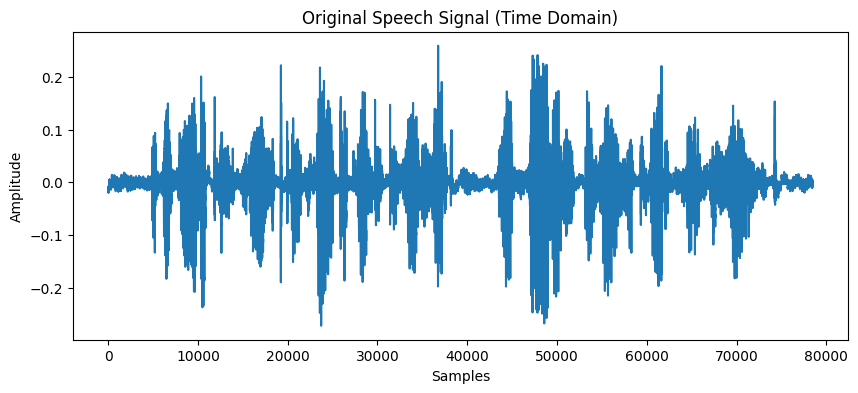

In [4]:
# Plot the original signal
plt.figure(figsize=(10, 4))
plt.plot(signal)
plt.title('Original Speech Signal (Time Domain)')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

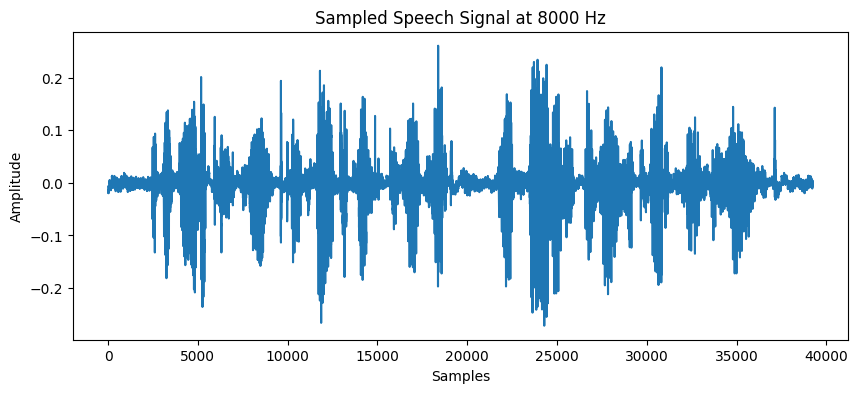

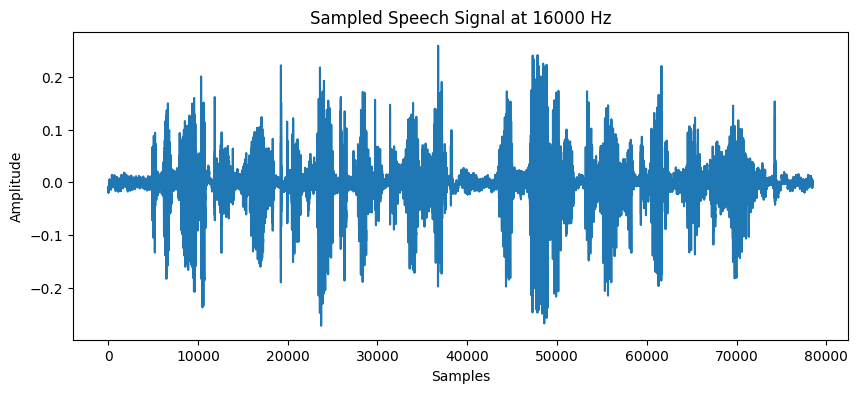

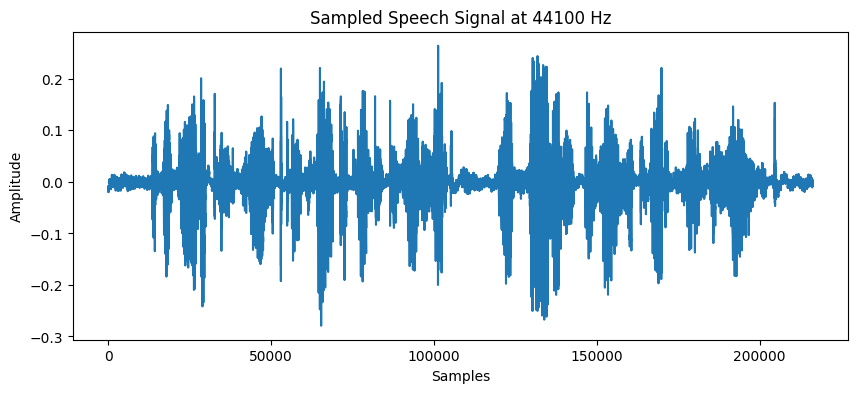

In [6]:
# 2. Sample the speech signal at different rates
sampling_rates = [8000, 16000, 44100]  # 8kHz, 16kHz, 44.1kHz
sampled_signals = {}

for sr in sampling_rates:
    sampled_signals[sr] = librosa.resample(signal, orig_sr=original_sample_rate, target_sr=sr)

    # Plot each sampled signal
    plt.figure(figsize=(10, 4))
    plt.plot(sampled_signals[sr])
    plt.title(f'Sampled Speech Signal at {sr} Hz')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.show()

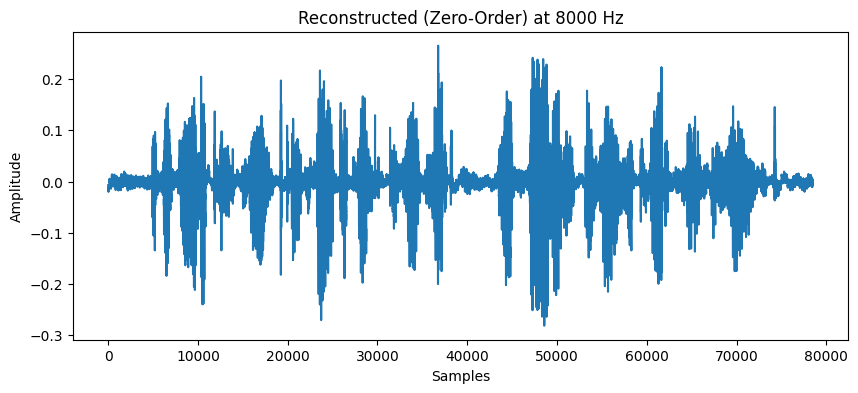

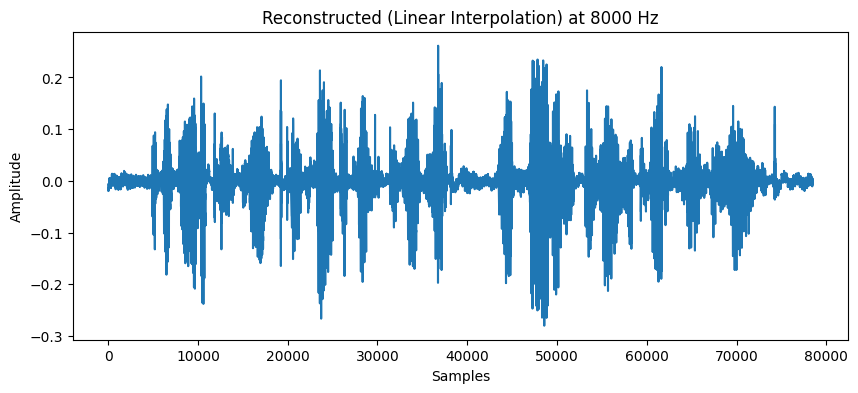

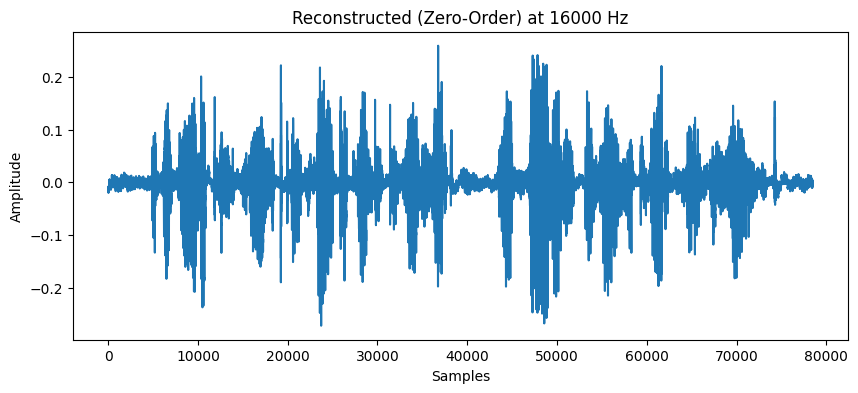

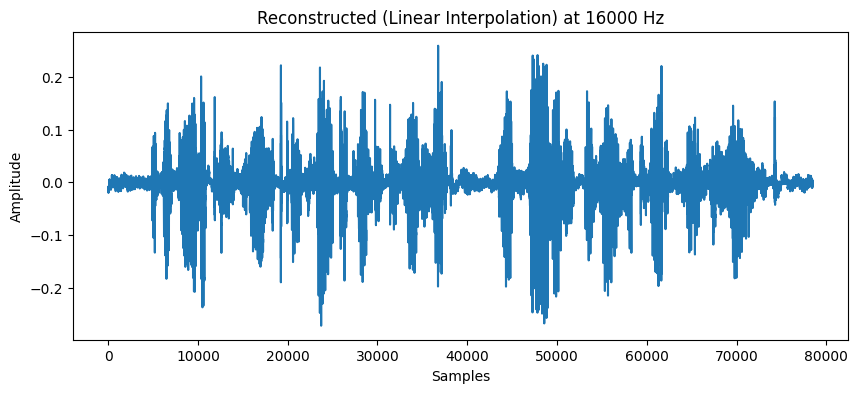

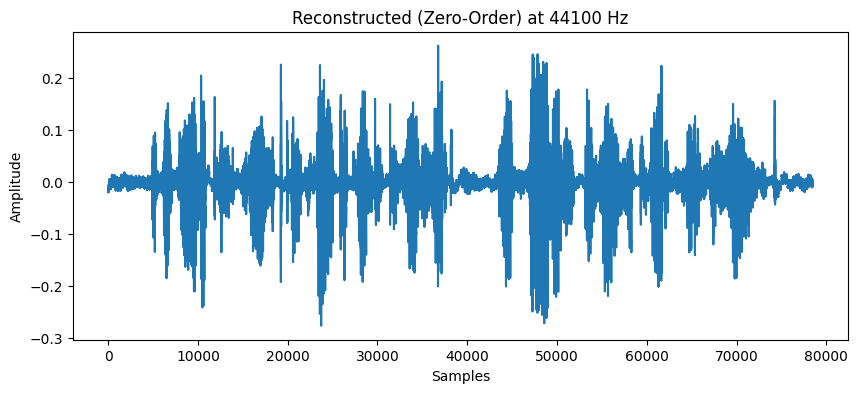

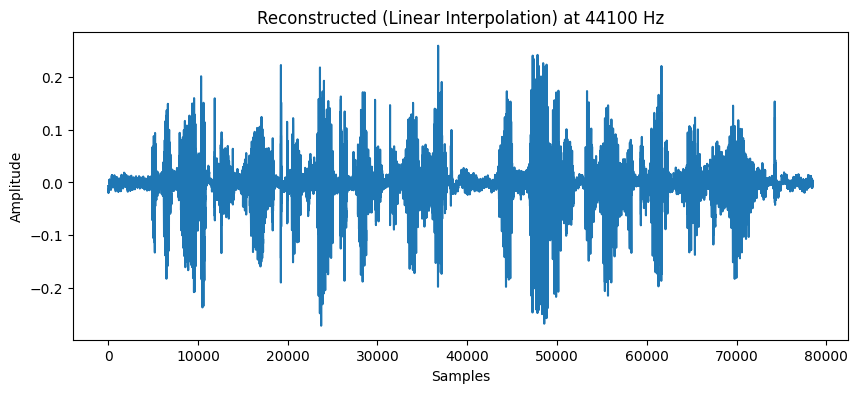

In [7]:
# 3. Reconstruct the signal using Zero-order hold (nearest-neighbor) and Linear interpolation
reconstructed_signals = {}

for sr in sampling_rates:
    # Zero-order hold interpolation
    zero_order_signal = scipy.signal.resample_poly(sampled_signals[sr], original_sample_rate, sr, window='boxcar')

    # Linear interpolation
    linear_interp_signal = scipy.signal.resample_poly(sampled_signals[sr], original_sample_rate, sr, window='hamming')

    reconstructed_signals[sr] = {
        'zero_order': zero_order_signal,
        'linear_interp': linear_interp_signal
    }

    # Plot reconstructed signals
    plt.figure(figsize=(10, 4))
    plt.plot(reconstructed_signals[sr]['zero_order'])
    plt.title(f'Reconstructed (Zero-Order) at {sr} Hz')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.plot(reconstructed_signals[sr]['linear_interp'])
    plt.title(f'Reconstructed (Linear Interpolation) at {sr} Hz')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.show()

In [9]:
# 4. Calculate Mean Squared Error (MSE)
mse_results = {}

for sr in sampling_rates:
    # Ensure both signals have the same length before calculating MSE
    min_length = min(len(signal), len(reconstructed_signals[sr]['zero_order']))

    zero_order_mse = mean_squared_error(signal[:min_length], reconstructed_signals[sr]['zero_order'][:min_length])
    linear_interp_mse = mean_squared_error(signal[:min_length], reconstructed_signals[sr]['linear_interp'][:min_length])

    mse_results[sr] = {
        'zero_order_mse': zero_order_mse,
        'linear_interp_mse': linear_interp_mse
    }

    print(f"MSE for {sr} Hz sampling:")
    print(f"  Zero-order Hold: {zero_order_mse}")
    print(f"  Linear Interpolation: {linear_interp_mse}")

MSE for 8000 Hz sampling:
  Zero-order Hold: 1.9212457118555903e-05
  Linear Interpolation: 1.8895860193879344e-05
MSE for 16000 Hz sampling:
  Zero-order Hold: 0.0
  Linear Interpolation: 0.0
MSE for 44100 Hz sampling:
  Zero-order Hold: 5.346020088836667e-07
  Linear Interpolation: 1.380340961532056e-07


In [10]:
# 5. Write inferences about sampling rate impact
for sr in sampling_rates:
    print(f"\nFor {sr} Hz sampling rate:")
    if mse_results[sr]['linear_interp_mse'] < mse_results[sr]['zero_order_mse']:
        print(f"Linear interpolation provides a better reconstruction compared to zero-order hold with lower MSE.")
    else:
        print(f"Zero-order hold provides a better reconstruction compared to linear interpolation with lower MSE.")


For 8000 Hz sampling rate:
Linear interpolation provides a better reconstruction compared to zero-order hold with lower MSE.

For 16000 Hz sampling rate:
Zero-order hold provides a better reconstruction compared to linear interpolation with lower MSE.

For 44100 Hz sampling rate:
Linear interpolation provides a better reconstruction compared to zero-order hold with lower MSE.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, firwin, resample_poly
from sklearn.metrics import mean_squared_error

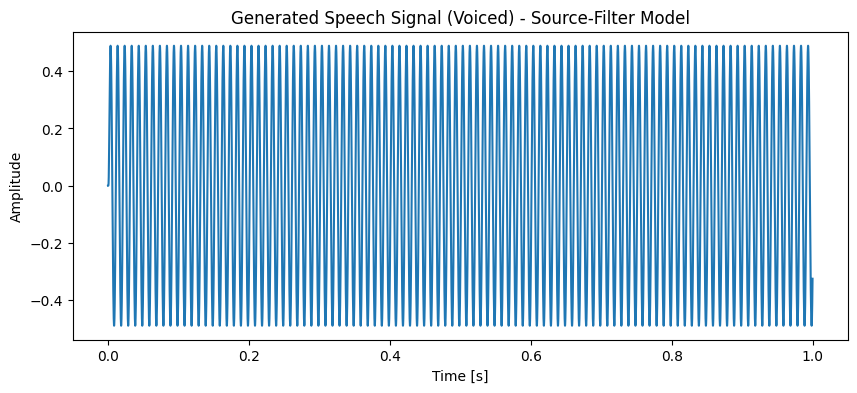

In [12]:
# 1. Generate a synthetic speech signal using the source-filter model
def generate_source_signal(duration, sample_rate, voiced=True):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

    if voiced:
        # Glottal pulse for voiced sounds (basic periodic signal)
        freq = 100  # Fundamental frequency for voiced sounds
        source_signal = 0.5 * np.sin(2 * np.pi * freq * t)
    else:
        # White noise for unvoiced sounds
        source_signal = np.random.randn(len(t))

    return source_signal, t

def apply_filter(source_signal, sample_rate):
    # Apply a simple FIR filter with formants to simulate vocal tract
    # Design a low-pass FIR filter using firwin
    cutoff = 500  # Cutoff frequency for the vocal tract filter
    numtaps = 101  # Filter length (higher values = smoother filter)
    fir_filter = firwin(numtaps, cutoff / (0.5 * sample_rate))

    # Apply filter to the source signal
    filtered_signal = lfilter(fir_filter, 1.0, source_signal)

    return filtered_signal

# Generate and plot the speech signal
sample_rate = 44100  # Sampling rate for synthetic signal
duration = 1.0  # Duration of the signal in seconds

# Voiced signal example
source_signal, t = generate_source_signal(duration, sample_rate, voiced=True)
filtered_signal = apply_filter(source_signal, sample_rate)

plt.figure(figsize=(10, 4))
plt.plot(t, filtered_signal)
plt.title('Generated Speech Signal (Voiced) - Source-Filter Model')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

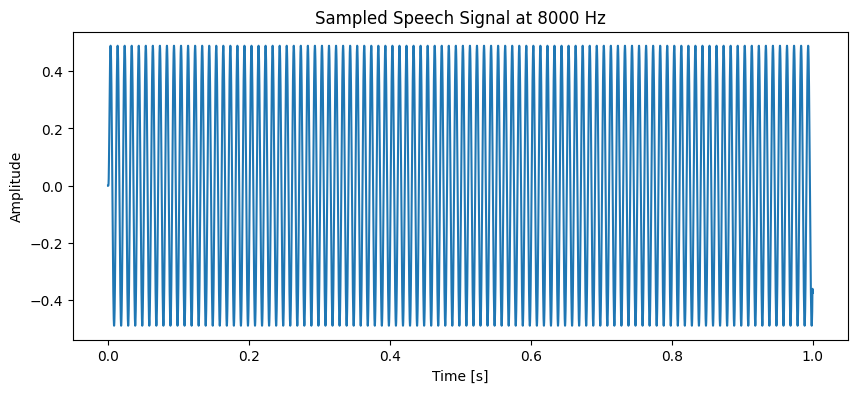

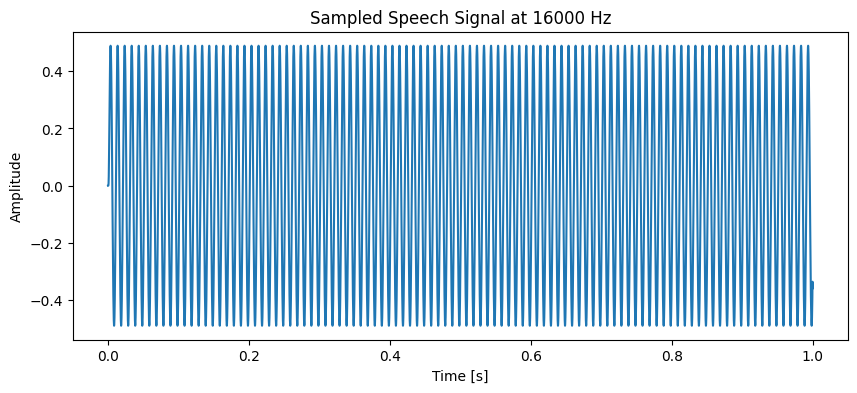

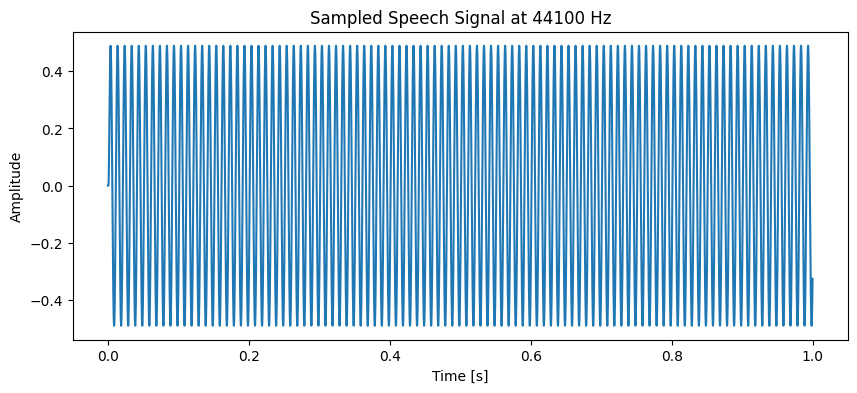

In [13]:
# 2. Sampling at different rates (8kHz, 16kHz, 44.1kHz)
sampling_rates = [8000, 16000, 44100]
sampled_signals = {}

for sr in sampling_rates:
    sampled_signals[sr] = resample_poly(filtered_signal, sr, sample_rate)

    # Plot sampled signals
    plt.figure(figsize=(10, 4))
    plt.plot(np.linspace(0, duration, len(sampled_signals[sr])), sampled_signals[sr])
    plt.title(f'Sampled Speech Signal at {sr} Hz')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.show()

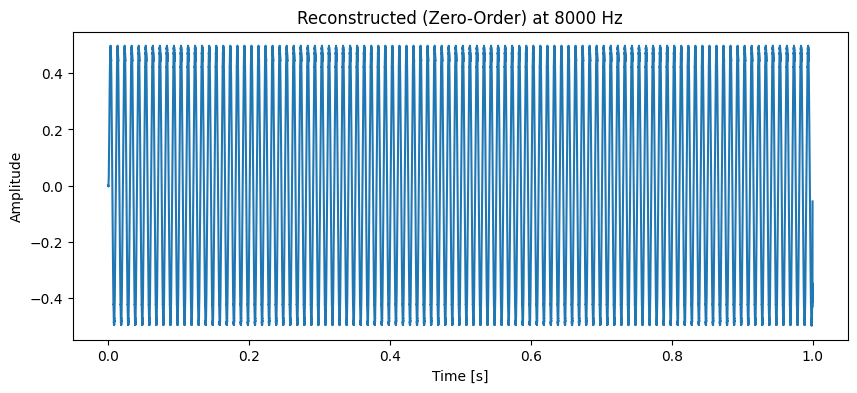

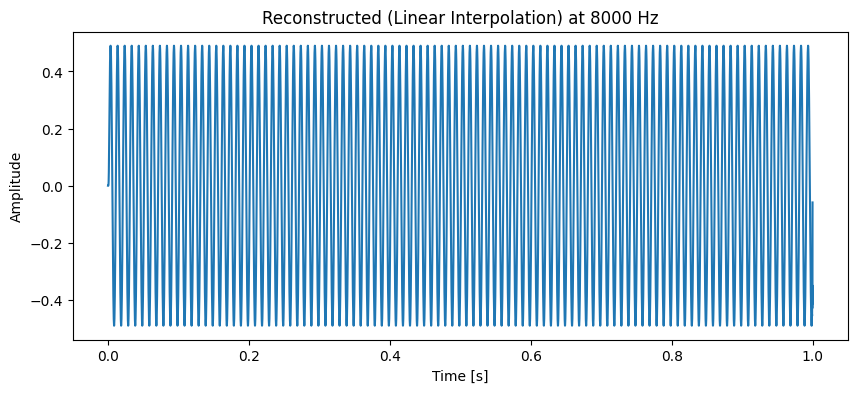

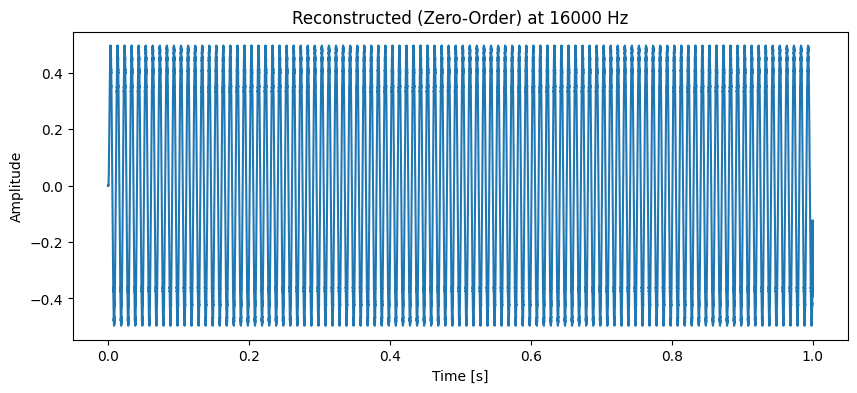

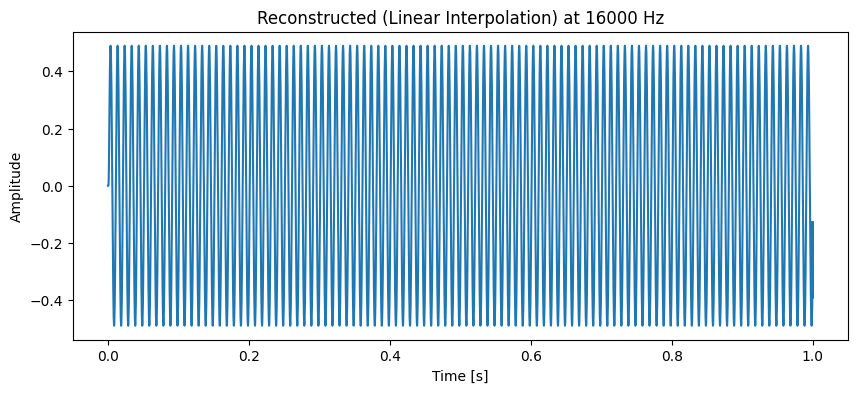

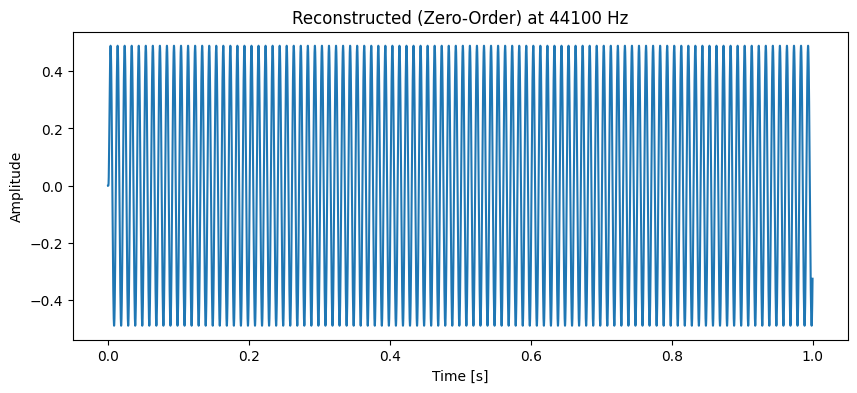

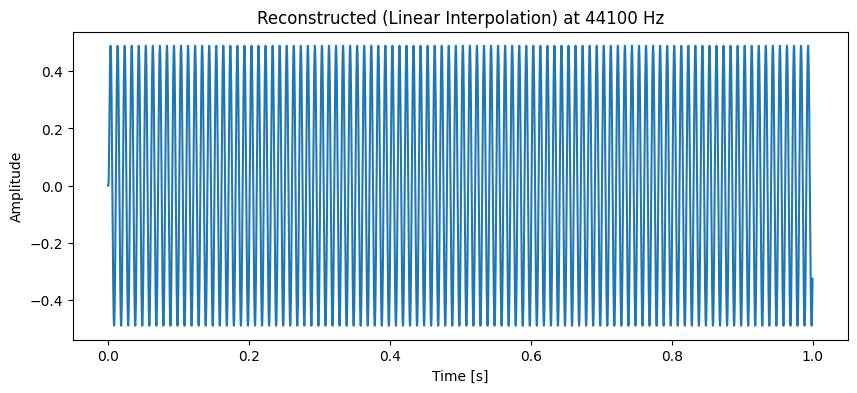

In [14]:
# 3. Reconstruct the signal using Zero-Order Hold and Linear Interpolation
reconstructed_signals = {}

for sr in sampling_rates:
    # Zero-order hold interpolation
    zero_order_signal = resample_poly(sampled_signals[sr], sample_rate, sr, window='boxcar')

    # Linear interpolation
    linear_interp_signal = resample_poly(sampled_signals[sr], sample_rate, sr, window='hamming')

    reconstructed_signals[sr] = {
        'zero_order': zero_order_signal,
        'linear_interp': linear_interp_signal
    }

    # Plot reconstructed signals
    plt.figure(figsize=(10, 4))
    plt.plot(np.linspace(0, duration, len(reconstructed_signals[sr]['zero_order'])), reconstructed_signals[sr]['zero_order'])
    plt.title(f'Reconstructed (Zero-Order) at {sr} Hz')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.plot(np.linspace(0, duration, len(reconstructed_signals[sr]['linear_interp'])), reconstructed_signals[sr]['linear_interp'])
    plt.title(f'Reconstructed (Linear Interpolation) at {sr} Hz')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.show()


In [15]:
# 4. Calculate the Mean Squared Error (MSE)
mse_results = {}

for sr in sampling_rates:
    zero_order_mse = mean_squared_error(filtered_signal, reconstructed_signals[sr]['zero_order'])
    linear_interp_mse = mean_squared_error(filtered_signal, reconstructed_signals[sr]['linear_interp'])

    mse_results[sr] = {
        'zero_order_mse': zero_order_mse,
        'linear_interp_mse': linear_interp_mse
    }

    print(f"MSE for {sr} Hz sampling:")
    print(f"  Zero-order Hold: {zero_order_mse}")
    print(f"  Linear Interpolation: {linear_interp_mse}")

MSE for 8000 Hz sampling:
  Zero-order Hold: 1.4045690240086098e-05
  Linear Interpolation: 3.3314991421182812e-06
MSE for 16000 Hz sampling:
  Zero-order Hold: 1.1643782917206851e-05
  Linear Interpolation: 1.1721367714651268e-06
MSE for 44100 Hz sampling:
  Zero-order Hold: 0.0
  Linear Interpolation: 0.0


In [16]:
# 5. Write inferences about sampling rate impact
for sr in sampling_rates:
    print(f"\nFor {sr} Hz sampling rate:")
    if mse_results[sr]['linear_interp_mse'] < mse_results[sr]['zero_order_mse']:
        print(f"Linear interpolation provides a better reconstruction compared to zero-order hold with lower MSE.")
    else:
        print(f"Zero-order hold provides a better reconstruction compared to linear interpolation with lower MSE.")


For 8000 Hz sampling rate:
Linear interpolation provides a better reconstruction compared to zero-order hold with lower MSE.

For 16000 Hz sampling rate:
Linear interpolation provides a better reconstruction compared to zero-order hold with lower MSE.

For 44100 Hz sampling rate:
Zero-order hold provides a better reconstruction compared to linear interpolation with lower MSE.
